In [2]:
from __future__ import unicode_literals
import os
import codecs
import pandas as pd
import numpy as np
from email.parser import Parser

%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

import regex as re

## I - Data Extraction

### Extract and store all files into pandas dataframe

### Extract features and body of each email 

In [3]:
msg = pd.read_csv('message_df.csv')

IOError: File message_df.csv does not exist

In [11]:
#colnames = message_df.columns.get_values().tolist()
#colnames.remove("Category")
#print(colnames)

## II- Data Exploration & Feature Engineering

### Missing Values in features: "Lines", "References" and "Organization"

"Rational for choosing these features to visualize"

In [6]:
msg = message_df
msg

,Body,Category,Date,From,Lines,Message-ID,NNTP-Posting-Host,Newsgroups,Organization,Path,References,Sender,Subject
0,"misc.entrepreneurs,misc.wanted,pnw.forsale,uw....",comp.sys.ibm.pc.hardware,18 Apr 1993 00:40:12 GMT,yuri@atmos.washington.edu,24,<1qq81cINNdjg@shelley.u.washington.edu>,windy.atmos.washington.edu,"comp.sys.ibm.pc.hardware,biz.comp.hardware,com...",University of Washington,cantaloupe.srv.cs.cmu.edu!rochester!udel!gatec...,None,None,100 simms and 100 sipps 1MB needed
1,Do all SCSI cards for DOS systems require a se...,comp.sys.ibm.pc.hardware,"Tue, 13 Apr 1993 13:47:11 GMT",randy@msc.cornell.edu,8,<1993Apr13.134711.25857@msc.cornell.edu>,None,comp.sys.ibm.pc.hardware,Cornell University,cantaloupe.srv.cs.cmu.edu!rochester!udel!gatec...,None,news@msc.cornell.edu,SCSI vs. IDE
2,My Western Digital also has three sets of pins...,comp.sys.ibm.pc.hardware,"Fri, 16 Apr 1993 05:50:42 GMT",cs3sd3ae@maccs.mcmaster.ca (Holly KS),11,<1993Apr16.055042.2196@mcshub.dcss.mcmaster.ca>,maccs.dcss.mcmaster.ca,comp.sys.ibm.pc.hardware,"Department of Computer Science, McMaster Unive...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,<1qkb9k$788@vela.acs.oakland.edu>,usenet@mcshub.dcss.mcmaster.ca,Re: Western Digital HD info needed
3,Hi All COMPAQ ownersA friend of mine has COMPA...,comp.sys.ibm.pc.hardware,18 Apr 1993 08:42:43 -0500,hhaldre@stacken.kth.se (Heikki Haldre),19,<199304181342.AA06917@sune.stacken.kth.se>,cs.utexas.edu,comp.sys.ibm.pc.hardware,UTexas Mail-to-News Gateway,cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,None,daemon@cs.utexas.edu,(Q) COMPAQ configuration. HELP!!
4,In article <C5usq4.Mpr@wybbs.mi.org> ken@wybbs...,comp.sys.ibm.pc.hardware,"Thu, 22 Apr 1993 18:21:44 GMT",les@chinet.chi.il.us (Leslie Mikesell),21,<C5wDo9.710@chinet.chi.il.us>,None,"comp.dcom.modems,comp.sys.ibm.pc.hardware,misc...",Chinet - Public Access UNIX,cantaloupe.srv.cs.cmu.edu!rochester!udel!wupos...,<C5usq4.Mpr@wybbs.mi.org>,None,Re: *** CONSUMER WARNING *** MidWest Micro (O...
5,In article <tigerC5K9oy.Gx@netcom.com> tiger@n...,comp.sys.ibm.pc.hardware,17 Apr 1993 22:34:26 GMT,galpin@cats.ucsc.edu (Dan),42,<1qq0liINN58j@darkstar.UCSC.EDU>,am.ucsc.edu,"comp.os.os2.misc,comp.sys.ibm.pc.hardware,alt....",University of California; Santa Cruz,cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,<C5B77J.5x3@utdallas.edu> <tigerC5K9oy.Gx@netc...,None,Re: BusLogic 542B questions
6,">> the ""attached"" fans look slick and work wel...",comp.sys.ibm.pc.hardware,"Fri, 23 Apr 1993 19:18:02 GMT",tfisher@CERIS.Purdue.EDU (Tom Fisher),14,<1993Apr23.191802.5955@CERIS.Purdue.EDU>,None,comp.sys.ibm.pc.hardware,Center for Environmental and Regulatory Inform...,cantaloupe.srv.cs.cmu.edu!rochester!udel!bogus...,None,None,Re: CPU Fans
7,In article <C5wKx1.Frv@news.iastate.edu> schau...,comp.sys.ibm.pc.hardware,"Fri, 23 Apr 1993 10:27:15 GMT",adrie@ica.philips.nl (Adrie Koolen),19,<1993Apr23.102715.969@ica.philips.nl>,None,"comp.sys.ibm.pc.hardware,comp.sys.amiga.hardwa...","Philips Consumer Electronics, Eindhoven, The N...",cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu...,<C5uw1t.3HI@eskimo.com> <kehchengC5w75x.F7o@ne...,None,Re: Monitors - Nanao?
8,In <199304181719.AA08489@sune.stacken.kth.se> ...,comp.sys.ibm.pc.hardware,"Sun, 18 Apr 1993 22:32:28 GMT",dannyb@panix.com (Daniel Burstein),17,<C5pAM5.1zE@panix.com>,None,comp.sys.ibm.pc.hardware,"PANIX Public Access Unix, NYC",cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cm...,<199304181719.AA08489@sune.stacken.kth.se>,None,Re: (Q) CONNER HD specs
9,I was just reading in PC Magazine that the per...,comp.sys.ibm.pc.hardware,16 Apr 93 21:05:16 GMT,begolej@csgrad.cs.vt.edu (James Begole),13,<4370@creatures.cs.vt.edu>,None,comp.sys.ibm.pc.hardware,"VPI&SU Computer Science Department, Blacksburg...",cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu...,None,usenet@creatures.cs.vt.edu,16MB ISA limit?


In [13]:
msg.isnull().sum()

Body                     0
Category                 0
Date                     0
From                     0
Lines                   60
Message-ID               0
NNTP-Posting-Host    11422
Newsgroups               0
Organization           851
Path                     0
References            7489
Sender                9125
Subject                  0
dtype: int64

Select features that seems more sensible for charting:
   - Lines
   - Organization
   - References

In [14]:
lines_null = msg[msg['Lines'].isnull()]['Category'].value_counts()
ref_null = msg[msg['References'].isnull()]['Category'].value_counts()
org_null = msg[msg['Organization'].isnull()]['Category'].value_counts()
pd.DataFrame({'Lines':lines_null,"Ref":ref_null, "Org":org_null})

,Lines,Org,Ref
alt.atheism,NaN,54,82
comp.graphics,1.0,37,529
comp.os.ms-windows.misc,2.0,28,450
comp.sys.ibm.pc.hardware,4.0,29,571
comp.sys.mac.hardware,5.0,48,523
comp.windows.x,4.0,19,614
misc.forsale,2.0,29,864
rec.autos,2.0,18,284
rec.motorcycles,2.0,17,185
rec.sport.baseball,6.0,9,252


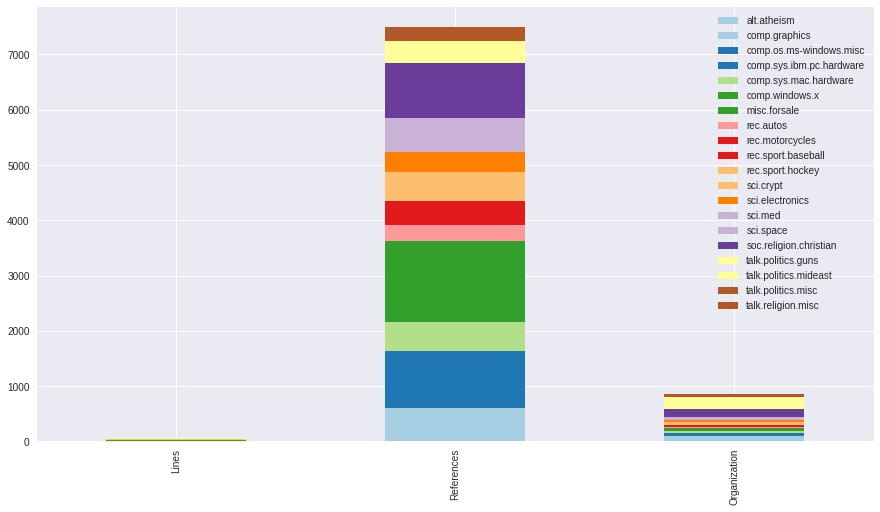

In [15]:
null_bar = pd.DataFrame([lines_null,ref_null,org_null])
null_bar.index=['Lines','References',"Organization"]
null_bar.plot(kind='bar',stacked=True, colormap='Paired', figsize=(15,8))

- **soc.religion.christian** has the most missing values for *References*
- **talk.politics.mideast** has most missing values for *Organization*

#### Expanding bar chart for _'Lines'_

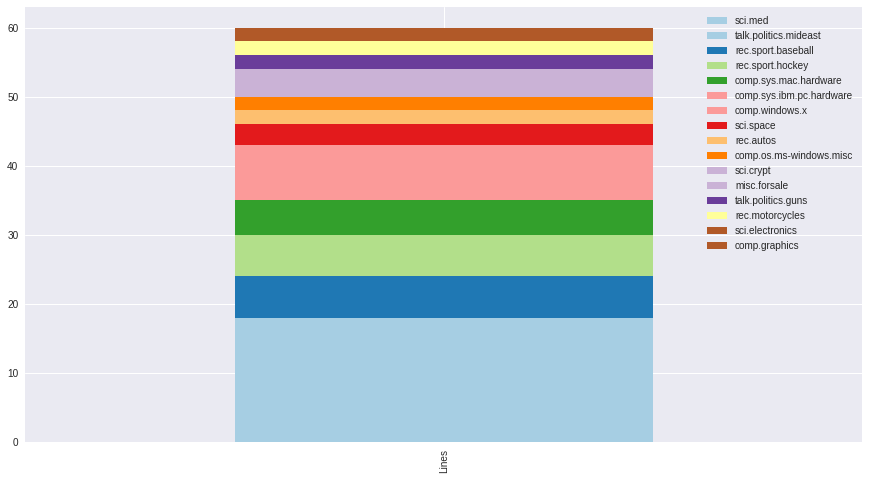

In [16]:
null_bar = pd.DataFrame([lines_null])
null_bar.index=['Lines']
null_bar.plot(kind='bar',stacked=True, colormap='Paired', figsize=(15,8))

- **sci.med** has most missing values for number of *Lines*

### Average number of Lines for each Category
   
   - Replace missing values for Lines with 0.

In [101]:
lines_bar['Lines'] = pd.to_numeric(lines_bar['Lines'], errors='coerce')

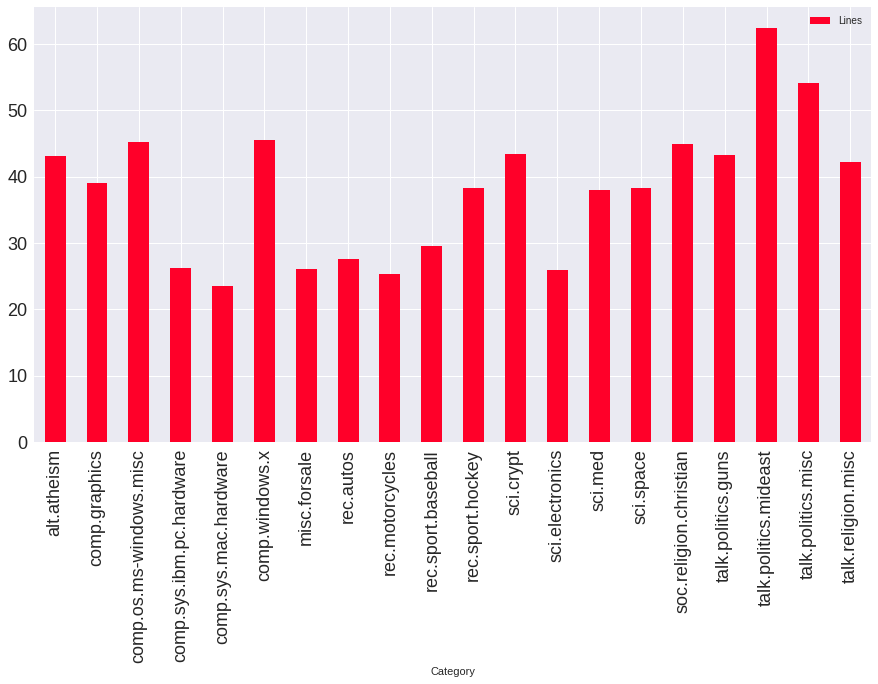

In [17]:
lines_bar = msg[['Lines','Category']].fillna(value=0)
lines_bar.iloc[:,0] = pd.to_numeric(lines_bar['Lines'], errors='coerce')
lines_bar = lines_bar.groupby(['Category']).mean()
lines_bar.plot(kind='bar',figsize=(15,8),fontsize=18,colormap='gist_rainbow')

In [18]:
lines_bar

,Lines
Category,
alt.atheism,43.168000
comp.graphics,39.032000
comp.os.ms-windows.misc,45.276000
comp.sys.ibm.pc.hardware,26.282000
comp.sys.mac.hardware,23.454000
comp.windows.x,45.586000
misc.forsale,26.113000
rec.autos,27.635000
rec.motorcycles,25.403000



- **talk.politics.mideast** has the *highest* average number of lines.
    - **talk.politics** categories have high average number of lines

- **comp.sys.mac.hardware** has the *least* average number of lines.

   

### Average no. of unique vocabulary
   - Utilize **SpaCy** package
   - Pre-processing on _'Body'_ 
        * Remove excess spaces between sentences
        * Lemmantize
        * Remove stopwords
   - Obtain set of unique vocabulary
   - Take mean to normalize 
   - Charting

In [13]:
import spacy
import string
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 

nlp = spacy.load('en')
punc = string.punctuation

In [20]:
""""""
type(stopwords)

frozenset

In [12]:
cat_df = msg[['Body','Category']]

In [22]:
#parsed_review = nlp(cat_df.iloc[0,0])

In [23]:
#token_pos = [token.pos_ for token in parsed_review]
#tokens = [token for token in parsed_review if token.pos_ == "NOUN"]
#len(token_pos)

#### Lemmatize, remove punctuations and stopwords

In [13]:
def clean_text(msg):
    tokens = [token.lemma_ for token in msg]
    #tokens = [tok for tok in tokens if (tok not in stopwords and tok not in punc)] 
    return tokens

In [109]:
cat_df['token_lemma'] = cat_df['Body'].apply(nlp).apply(clean_text)
cat_df['unique_tokens'] = cat_df['token_lemma'].apply(set).apply(len)
print(cat_df.head())

/home/juan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
vocab_bar

NameError: name 'vocab_bar' is not defined

In [ ]:
vocab_bar = cat_df[['unique_tokens','Category']]
vocab_bar = vocab_bar.groupby(['Category']).mean()
vocab_bar.plot(kind='bar',figsize=(20,10),fontsize= 20,colormap='Pastel2')

- **talk.politics.mideast** documents contains the __most__ average number of unique vocabulary
- **misc.forsale** documents contains the __least__ average number of unique vocabulary

Overall, documents in **talk.politics** contains the most average number of unique vocabulary

### Top 5 most frequent NOUN per category

NOUN could be a good predictor of an email's category
- Implement Part-of-Speech tagging
- Extract NOUN words
- Obtain frequency of NOUN words per category
- Chart top 5 most frequent words per category

"""
However, words that are not nouns can act as nouns:

Phrases acting as nouns: *To write with power* is his ultimate goal. <br>
Clause acting as nouns: The teacher knew *who did the homework*.

So we do **NOUN CHUNKS**.

In [14]:
import collections

#### Expand list of stopwords

In [40]:
stopw = [x for x in stopwords]
stopw.extend(['what','when','who','why', 'X', 'article', 'thing', 'way'])

In [16]:
def tag_text(text):
    text = nlp(text)
    tokens = [str(token.lemma_) for token in text if token.pos_ == "NOUN"]
#     tokens = [str(np) for np in text.noun_chunks]
    tokens = [tok for tok in tokens if (tok not in stopw and tok not in punc)] 
    return tokens

In [30]:
body_df.iloc[0,0]

NameError: name 'body_df' is not defined

In [38]:
""""""
parsed_review= body_df.iloc[0,0]
# token_text = [token.orth_ for token in parsed_review]
# token_pos = [token.pos_ for token in parsed_review]

# pd.DataFrame(zip(token_text, token_pos),
#              columns=['token_text', 'part_of_speech'])
tag_text(parsed_review)

['hang',
 'newnickname',
 'size',
 'falafel',
 'r',
 '3553kid',
 'home',
 'posting',
 'week',
 'software',
 'crack',
 'jaeger@buphy.bu.edu',
 'discussion',
 'nature',
 'verse',
 'title',
 'introduction',
 'incident',
 'explanation',
 'historicity',
 'episode',
 'follows]i',
 'affairs,>rushdie',
 'admission',
 'version',
 'orientalist',
 'incident',
 'story',
 'myth',
 'school',
 'boy',
 'andgirl',
 'imagination',
 'fiction',
 'crisis',
 'faith',
 'myth',
 'actor',
 'role',
 'angel',
 'history',
 'theology',
 'book',
 'likestorie',
 'relationship',
 'reformedprostitute',
 'myth',
 'mythos',
 'legend',
 'work',
 'blasphemer',
 'child',
 'book',
 'ofstorie',
 'idea',
 'storyteller',
 'specificstoryteller',
 'story',
 'ridicule',
 'integrity',
 'integrity',
 'thispart',
 'story',
 'reason',
 "rushdie'sintent",
 'archangel',
 'verse',
 'provenance',
 'reading',
 'voice',
 'word',
 'speaker',
 'voice',
 'eye',
 'kind',
 'vision',
 'lip',
 'mouth',
 'throat',
 'tooth',
 'postman',
 'fun',
 'y

In [36]:
""""""
collections.Counter(tag_text(parsed_review)).most_common(5)

[('I', 4664), ('It', 627), ('God', 570), ('You', 387), ('people', 359)]

In [16]:
body_df = pd.DataFrame(cat_df.groupby('Category')['Body'].apply(lambda x: x.sum()))
body_df['Body']

Category
alt.atheism                 healta@saturn.wwc.edu (Tammy R Healy) writes: ...
comp.graphics               Hi there,  I am looking for advice on software...
comp.os.ms-windows.misc     In article <1993Apr29.220709.7347@mksol.dseg.t...
comp.sys.ibm.pc.hardware    misc.entrepreneurs,misc.wanted,pnw.forsale,uw....
comp.sys.mac.hardware       In article <16BAA771E.C558172@mizzou1.missouri...
comp.windows.x              Contents:Problems with table widgets in R5\tTh...
misc.forsale                I have 2 foot switches for sale.  They're grea...
rec.autos                   With the popularity of minivans, the market ro...
rec.motorcycles             In article <1993Apr5.151323.7183@rd.hydro.on.c...
rec.sport.baseball          <RVESTERM@vma.cc.nd.edu> writes:>let's face it...
rec.sport.hockey            In <1993Apr22.212219.23130@iscnvx.lmsc.lockhee...
sci.crypt                   In article <1993Apr17.061326.16130@clarinet.co...
sci.electronics             I'm looking for any and all

In [39]:
body_df['token_noun'] = body_df['Body'].apply(tag_text)

In [40]:
noun_bar = body_df.iloc[:,1].apply(collections.Counter).apply(lambda x:x.most_common(5))

In [127]:
pd.options.display.max_colwidth = -1
pd.DataFrame(noun_bar)

,token_noun
Category,
alt.atheism,"[(people, 856), (time, 463), (religion, 438), (atheist, 413), (value, 360)]"
comp.graphics,"[(image, 1499), (file, 970), (program, 616), (format, 588), (color, 524)]"
comp.os.ms-windows.misc,"[(file, 883), (window, 512), (driver, 449), (problem, 426), (card, 350)]"
comp.sys.ibm.pc.hardware,"[(drive, 996), (card, 651), (problem, 441), (disk, 422), (controller, 408)]"
comp.sys.mac.hardware,"[(problem, 506), (drive, 444), (monitor, 308), (card, 272), (machine, 252)]"
comp.windows.x,"[(x, 1379), (file, 977), (window, 965), (program, 693), (server, 644)]"
misc.forsale,"[(sale, 381), (price, 304), (offer, 296), (mail, 255), (shipping, 238)]"
rec.autos,"[(car, 1739), (engine, 389), (year, 289), (time, 281), (problem, 239)]"
rec.motorcycles,"[(bike, 874), (dod, 411), (time, 279), (dog, 249), (motorcycle, 226)]"


In [ ]:
noun_bar

## IV - Data Modelling

### Split dataset into training and testing
- Full text dataset
- Noun dataset

In [39]:
x = msg['Body']
y = msg['Category']

x_text = x.apply
x_noun = x.apply(tag_text).apply(str)

In [38]:
pd.options.display.max_colwidth = -1
x

0        ['misc.entrepreneurs,misc.wanted,pnw.forsale,uw.pc.ibm,seattle.forsale,uw..forsale,misc.forsale,misc.forsale.computers.d,misc.forsale.computers.pc-clone,misc.forsale.coomputers.other,distribution', 'worldfollowup', 'from:yuri@atmos.washington.edureply-to', 'yuri@atmos.washington.eduorganization', 'subject', 'simms', 'sipp', 'mb', 'neededkeyword', 'simms', 'sipp', 'mb', 'price', 'offer', 'ave', 'home', 'work', 'fax)internet', 'yuri@atmos.washington.eduuucp', 'beaver!atmos.washington.edu!yuri']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [32]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

### Vectorizer
 - CountVectorizer
 - TfidfVectorizer (norm ='l1') : Manhattan distance 
 - TfidfVectorizer (norm ='l2') : Euclidean norm
 
CountVectorizer: Convert a collection of text documents to a matrix of token counts. <br>

TfidfVectorizer normalizes its result : Equivalent to CountVectorizer followed by TfidfTransformer.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

### Naive Bayes 
- Utilize Pipeline for cross-validation across different vectorizers

In [24]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [28]:
# create a pipeline of CountVectorizer and Naive Bayes
nb_count = make_pipeline(count_vect, nb)
nb_tfidf = make_pipeline(tfidf_vect, nb)

In [34]:
# cross_val splits data into training and testing 
# cross-validate the entire pipeline
# cv specifies the number of folds
from sklearn.model_selection import cross_val_score

print('Score for CountVectorizer and NB:')
print(cross_val_score(nb_count, x, y, cv=6, scoring='accuracy').mean())

Score for CountVectorizer and NB:
0.727165153378


In [35]:
print('Score for l1 and NB:')
print(cross_val_score(nb_tfidf, x, y, cv=6, scoring='accuracy').mean())

Score for l1 and NB:
0.756710521628


### K-Nearest-Neighbours (KNN)
 - **Non-parametric**: required no prior knowledge of the distribution of the data
 - **Instanace-based**: memorizes the training instance
 - Minimal training but expensive testing (memory + computational cost): classifying a given observation = run down of whole data set. **Not optimal for huge datasets**
 
 Cons: 
 - Can suffer from skewed class distributions when a certain class dominates the majority voting of the new example
 - Accuracy degrade with high-dimension data due to little difference between nearest and farthest neighbour

Improvement:
- skewed class distance: weighed voting
- changing distance metric: hamming distance for text

In [50]:
# use KNN with K=800
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [51]:
knn_count = make_pipeline(count_vect, knn)
knn_tfidf = make_pipeline(tfidf_vect, knn)

In [131]:
print('Score for CountVectorizer and KNN:')
print(cross_val_score(knn_count, x, y, cv=6, scoring='accuracy').mean())

Score for CountVectorizer and KNN:
0.140066221256


In [130]:
print('Score for l1 and KNN:')
print(cross_val_score(knn_tfidf, x, y, cv=6, scoring='accuracy').mean())

Score for l1 and KNN:
0.0640616425167


### Support Vector Machine (SVM)

RBF kernel is usully for images, not for text.
Linear kernels ar egood for text and compute faster 

In [47]:
# use SVM with a linear kernel
from sklearn import svm
svm = svm.SVC()

In [48]:
svm_count = make_pipeline(count_vect, svm)
svm_tfidf = make_pipeline(tfidf_vect, svm)

In [138]:
print('Score for CountVectorizer and SVM:')
print(cross_val_score(svm_count, x, y, cv=6, scoring='accuracy').mean())

Score for CountVectorizer and SVM:
0.653541222005


In [40]:
print('Score for l1 and SVM:')
print(cross_val_score(svm_tfidf, x, y, cv=6, scoring='accuracy').mean())

Score for l1 and SVM:


KeyboardInterrupt: 

### GridSearchCV with Pipeline

- **GridSearchCV** is usually used to locate optimal tuning parameters by performing an "exhaustive grid search" of different parameter combinations to obtain the best cross-validated accuracy.

- Passing **Pipeline** to **GridSearchCV** allows us to optimize tuning parameters for both the vectorizer and model.

Tfidf:

   max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:

max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
max_df = 25 means "ignore terms that appear in more than 25 documents".
The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

min_df is used for removing terms that appear too infrequently. For example:

min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
min_df = 5 means "ignore terms that appear in less than 5 documents".
The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms. 

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Paramsfor countvectorizer 
param_grid_nb = {'countvectorizer__token_pattern':[r"\b\w\w+\b", r"'([a-z ]+)'"],
                 'multinomialnb__alpha':[0,0.025,0.05,0.1,0.3]}

param_grid_knn = {'countvectorizer__token_pattern':[r"\b\w\w+\b", r"'([a-z ]+)'"],
                  'kneighborsclassifier__n_neighbors':[10,200,500,800,1200],
                  'kneighborsclassifier__weights':['uniform','distance'],
                  'kneighborsclassifier__metric':['euclidean','minkowski']}

param_grid_svm = {'countvectorizer__token_pattern':[r"\b\w\w+\b", r"'([a-z ]+)'"],
                  'svc__C':[1.0,20.5,100.0,250.0,500.0],
                  'svc__tol':[0.0001,0.001,0.01,0.1,0.011]}

In [39]:
nb_tfidf.get_params().keys()

['tfidfvectorizer__lowercase',
 'tfidfvectorizer__vocabulary',
 'tfidfvectorizer__dtype',
 'tfidfvectorizer__binary',
 'tfidfvectorizer__encoding',
 'tfidfvectorizer__decode_error',
 'tfidfvectorizer__stop_words',
 'tfidfvectorizer__norm',
 'multinomialnb',
 'tfidfvectorizer__max_features',
 'tfidfvectorizer__use_idf',
 'tfidfvectorizer__preprocessor',
 'tfidfvectorizer__tokenizer',
 'multinomialnb__class_prior',
 'tfidfvectorizer__strip_accents',
 'tfidfvectorizer__analyzer',
 'tfidfvectorizer',
 'tfidfvectorizer__max_df',
 'tfidfvectorizer__smooth_idf',
 'multinomialnb__fit_prior',
 'tfidfvectorizer__input',
 'tfidfvectorizer__sublinear_tf',
 'tfidfvectorizer__min_df',
 'multinomialnb__alpha',
 'tfidfvectorizer__ngram_range',
 'tfidfvectorizer__token_pattern',
 'steps']

In [44]:
# Params for tfidfvectorizer
param_grid_nb_tfidf = {'tfidfvectorizer__token_pattern':[r"\b\w\w+\b", r"'([a-z ]+)'"],
                       'multinomialnb__alpha':[0,0.025,0.05,0.1,0.3],
                       'tfidfvectorizer__norm':['l1','l2'],
                       'tfidfvectorizer__min_df':[0.0,0.03,0.1],
                       'tfidfvectorizer__use_idf':[True,False]}


param_grid_knn_tfidf = {'tfidfvectorizer__token_pattern':[r"\b\w\w+\b", r"'([a-z ]+)'"],
                        'kneighborsclassifier__n_neighbors':[10,200,500,800,1200],
                        'kneighborsclassifier__weights':['uniform','distance'],
                        'kneighborsclassifier__metric':['euclidean','minkowski'],
                        'tfidfvectorizer__norm':['l1','l2'],
                       'tfidfvectorizer__min_df':[10,15.5,20]}

param_grid_svm_tfidf = {'tfidfvectorizer__token_pattern':[r"\b\w\w+\b", r"'([a-z ]+)'"],
                        'svc__C':[1.0,20.5,100.0,250.0,500.0],
                        'svc__tol':[0.0001,0.001,0.01,0.1,0.011],
                        'tfidfvectorizer__norm':['l1','l2'],
                       'tfidfvectorizer__min_df':[10,15.5,20]}

In [37]:
# Tfidf Naive Bayes
grid_nb_tfidf = GridSearchCV(nb_tfidf, param_grid_nb_tfidf, cv=5, scoring='accuracy')
grid_nb_tfidf.fit(x_train,y_train)

print(grid_nb_tfidf.best_score_)
print(grid_nb_tfidf.best_params_)

/home/juan/anaconda2/lib/python2.7/site-packages/sklearn/naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


0.770354070814
{u'tfidfvectorizer__token_pattern': u'\\b\\w\\w+\\b', u'tfidfvectorizer__norm': u'l2', u'multinomialnb__alpha': 0.05, u'tfidfvectorizer__min_df': 0.0, u'tfidfvectorizer__use_idf': True}


In [5]:
# CountVectorizer Naive Bayes
grid_nb_count = GridSearchCV(nb_count, param_grid_nb, cv=5, scoring='accuracy')
%time grid_nb_count.fit(x_train,y_train)

print(grid_nb_count.best_score_)
print(grid_nb_count.best_params_)

NameError: name 'nb_count' is not defined

In [53]:
"""Takes forever"""
# Tfidf Knn
grid_knn_tfidf = GridSearchCV(knn_tfidf, param_grid_knn_tfidf, cv=5, scoring='accuracy')
grid_knn_tfidf.fit(x_train,y_train)

print(grid_knn_tfidf.best_score_)
print(grid_knn_tfidf.best_params_)

KeyboardInterrupt: 

In [203]:
# CountVectorizer Knn
grid_knn_count = GridSearchCV(knn_count, param_grid_knn, cv=5, scoring='accuracy')
grid_knn_count.fit(x_train,y_train)
print(grid_knn_count.best_score_)
print(grid_knn_count.best_params_)

0.428964344652
{u'countvectorizer__token_pattern': u"'([a-z ]+)'", u'kneighborsclassifier__n_neighbors': 10, u'kneighborsclassifier__weights': u'distance'}


In [ ]:
# Tfidf SVM
grid_svm_tfidf = GridSearchCV(svm_tfidf, param_grid_svm_tfidf, cv=5, scoring='accuracy')
grid_svm_tfidf.fit(x_train,y_train)

print(grid_svm_tfidf.best_score_)
print(grid_svm_tfidf.best_params_)

In [ ]:
# CountVectorizer SVM
grid_svm_count = GridSearchCV(svm_count, param_grid_svm, cv=5, scoring='accuracy')
grid_svm_count.fit(x_train,y_train)
print(grid_svm_count.best_score_)
print(grid_svm_count.best_params_)

### RandomizedSearchCV with Pipeline
- It is too computationally infeasible to search all possible combination of parameter values.
- **RandomizedSearchCV** searches a sample of the parameter values with control on computational "budget".

In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Tfidf Naive Bayes
random_nb_tfidf = RandomizedSearchCV(nb_tfidf, param_grid_nb_tfidf, cv=5, scoring='accuracy', n_iter=5, random_state=1)
random_nb_tfidf.fit(x_train,y_train)
print(random_nb_tfidf.best_score_)
print(random_nb_tfidf.best_params_)

0.756484630259
{u'tfidfvectorizer__token_pattern': u'\\b\\w\\w+\\b', u'tfidfvectorizer__norm': u'l2', u'multinomialnb__alpha': 0.1, u'tfidfvectorizer__min_df': 0.0, u'tfidfvectorizer__use_idf': False}


In [ ]:
# Tfidf SVM
random_svm_tfidf = RandomizedSearchCV(svm_tfidf, param_grid_svm_tfidf, cv =5, scoring='accuracy', n_iter=5, random_state=1)
random_svm_tfidf.fit(x_train,y_train)
print(random_svm_tfidf.best_score_)
print(random_svm_tfidf.best_params_)

### Ensembling models

Combining of several predictive models to produce a combined model that is better than any individual model.
- **Regression:** average the predictions made by the individual models
- **Classification:** let the models "vote" and use the most common prediction, or average the predicted probabilities

For ensembling to work well, the models must have the following characteristics:

- **Accurate:** they outperform the null model
- **Independent:** their predictions are generated using different "processes", such as:
    - different types of models
    - different features
    - different tuning parameters

### Null Model

- For **classification** problems, the null model always predicts the most frequent class from the training data.
- For **regression problems**, the null model always predicts the mean of the response value from the training data.
- It can be a useful **baseline model** against which our model is measured.

In [146]:
# calculate null model accuracy
y_test.value_counts().head(1)/y_test.shape

talk.politics.misc    0.0586
Name: Category, dtype: float64